<a href="https://colab.research.google.com/github/lukaszek358/SDA/blob/main/projekt_ko%C5%84cowy_modelowanie_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Modelowanie

In [2]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import max_error

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV #import biblioteki dla doboru optymalnych parametrów

from sklearn.preprocessing import PolynomialFeatures #import biblioteki regresji wielomianowej
from sklearn.linear_model import LinearRegression #import biblioteki regresji liniowej

from sklearn.tree import DecisionTreeRegressor #import biblioteki dla drzew decyzyjnych
from sklearn import tree #import modelu drzewa

In [3]:
data = pd.read_csv('/content/drive/MyDrive/preprocessing_flights.csv')
data=data.drop('Unnamed: 0', axis = 1)

In [4]:
sample_size = 15000
sampled_data = data.sample(n= sample_size, random_state = 42)

In [5]:
sampled_data

,date,scheduled_departure,departure_delay,taxi_out,wheels_off,scheduled_time,distance,scheduled_arrival,arrival_delay,airline,...,airline_Delta Air Lines Inc.,airline_Frontier Airlines Inc.,airline_Hawaiian Airlines Inc.,airline_JetBlue Airways,airline_Skywest Airlines Inc.,airline_Southwest Airlines Co.,airline_Spirit Air Lines,airline_US Airways Inc.,airline_United Air Lines Inc.,airline_Virgin America
5142765,2015-03-26,851,3.0,15.0,869,217.0,1330,1068,-23.0,Atlantic Southeast Airlines,...,0,0,0,0,0,0,0,0,0,0
3901978,2015-07-03,405,-6.0,11.0,410,90.0,495,435,-4.0,Southwest Airlines Co.,...,0,0,0,0,0,1,0,0,0,0
1709905,2015-09-25,360,-11.0,12.0,361,73.0,273,433,-23.0,JetBlue Airways,...,0,0,0,1,0,0,0,0,0,0
4853679,2015-07-01,1278,13.0,15.0,1306,105.0,528,1383,9.0,Atlantic Southeast Airlines,...,0,0,0,0,0,0,0,0,0,0
2891404,2015-11-23,1153,-6.0,23.0,1170,161.0,1075,1374,4.0,Skywest Airlines Inc.,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955293,2015-12-14,1088,86.0,21.0,1195,57.0,164,1145,87.0,Atlantic Southeast Airlines,...,0,0,0,0,0,0,0,0,0,0
2424300,2015-09-23,1005,-1.0,24.0,1028,321.0,2125,1146,-20.0,American Airlines Inc.,...,0,0,0,0,0,0,0,0,0,0
3531424,2015-07-14,715,18.0,7.0,740,85.0,480,800,9.0,Southwest Airlines Co.,...,0,0,0,0,0,1,0,0,0,0
5200874,2015-09-04,1119,145.0,11.0,1275,106.0,533,1225,156.0,Atlantic Southeast Airlines,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = sampled_data.drop(['date' ,'arrival_delay', 'airline', 'scheduled_departure', 'wheels_off'], axis=1)
y = sampled_data['arrival_delay']

In [7]:
X.head()

,departure_delay,taxi_out,scheduled_time,distance,scheduled_arrival,scheduled_departure_norm,cos_scheduled_departure_norm,day_of_week_norm,cos_day_of_week_norm,scheduled_arrival_norm,...,airline_Delta Air Lines Inc.,airline_Frontier Airlines Inc.,airline_Hawaiian Airlines Inc.,airline_JetBlue Airways,airline_Skywest Airlines Inc.,airline_Southwest Airlines Co.,airline_Spirit Air Lines,airline_US Airways Inc.,airline_United Air Lines Inc.,airline_Virgin America
5142765,3.0,15.0,217.0,1330,1068,3.713188,-8.410390e-01,3.590392,-0.900969,4.660029,...,0,0,0,0,0,0,0,0,0,0
3901978,-6.0,11.0,90.0,495,435,1.767146,-1.950903e-01,4.487990,-0.222521,1.898046,...,0,0,0,0,0,1,0,0,0,0
1709905,-11.0,12.0,73.0,273,433,1.570796,6.123234e-17,4.487990,-0.222521,1.889319,...,0,0,0,1,0,0,0,0,0,0
4853679,13.0,15.0,105.0,528,1383,5.576327,7.604060e-01,2.692794,-0.900969,6.034476,...,0,0,0,0,0,0,0,0,0,0
2891404,-6.0,23.0,161.0,1075,1374,5.030912,3.131638e-01,0.897598,0.623490,5.995206,...,0,0,0,0,1,0,0,0,0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model regresji liniowej

In [9]:
linear_model = LinearRegression()

In [10]:
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
me = max_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Max Error: {me}')
print(f'R2_Score: {r2}')

Mean Absolute Error: 7.040052464413818
Mean Squared Error: 101.39470110406683
Max Error: 148.18166199024267
R2_Score: 0.9483019543196718


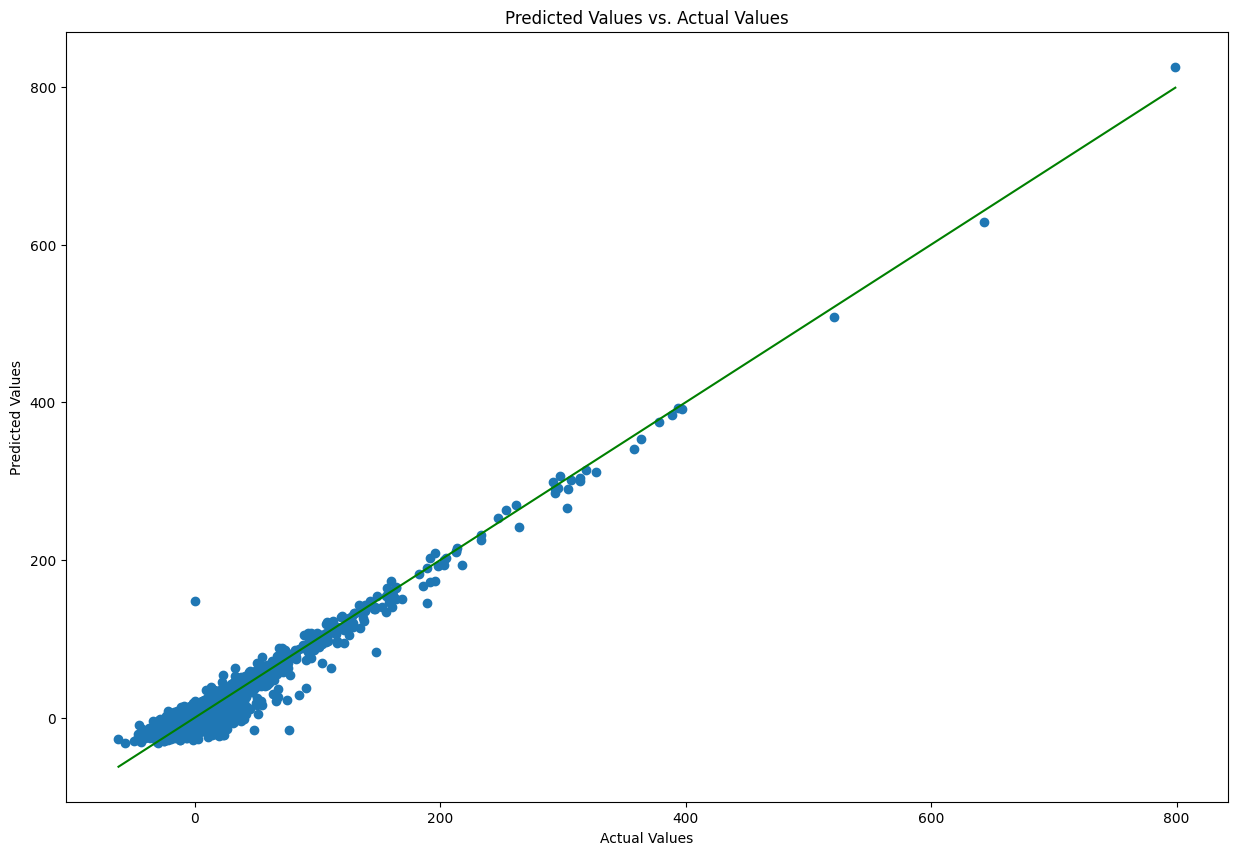

In [15]:
plt.figure(figsize = (15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs. Actual Values')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green')

plt.show()
plt.show()

# Model Regresji Wielomianowej (Polynomial Features) - 2 stopnia

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
poly = PolynomialFeatures(degree = 2)

X_poly = poly.fit_transform(X_train) #dopasowanie danych instacją 'poly' i przekształcanie metodą 'fit_transform' do zmiennej zawierającej cechy wielomianowe
X_test_poly = poly.fit_transform(X_test)
# X_test_poly.shape

(3750, 465)

In [18]:
regressor_poly = LinearRegression()

#trenowanie modelu na X o cechach wielomianu
regressor_poly.fit(X_poly, y_train)

# predykowanie y_pred na zmiennej X już po przekształceniu i cechach wielomianu
y_pred = regressor_poly.predict(X_test_poly)
# y_pred.shape

(3750,)

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
me = max_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [21]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Max Error: {me}')
print(f'R2_Score: {r2}')

Mean Absolute Error: 7.239588730604924
Mean Squared Error: 126.4587672020628
Max Error: 217.01398448883305
R2_Score: 0.9355225563830968


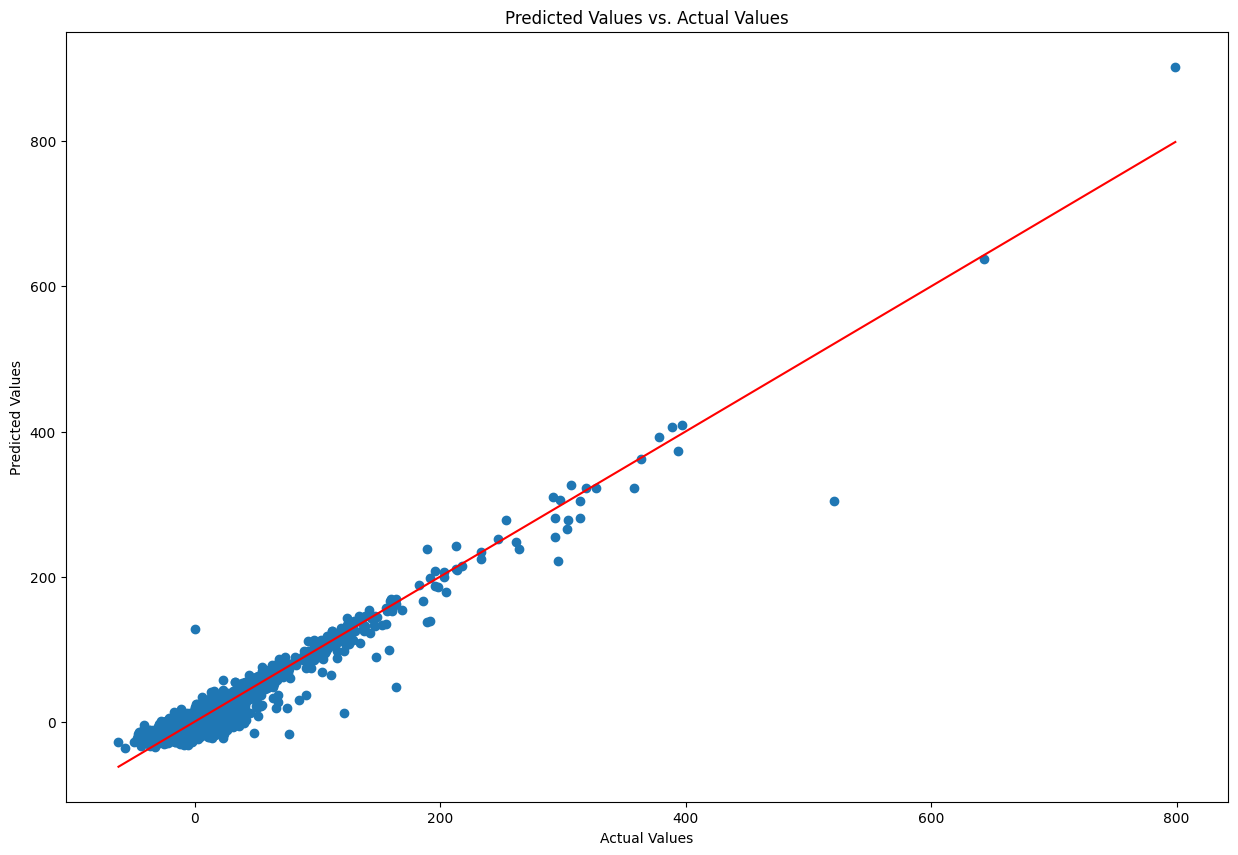

In [22]:
plt.figure(figsize = (15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs. Actual Values')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

plt.show()

# Model Regresji Wielomianowej (Polynomial Features) - 3 stopnia

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_train) #dopasowanie danych instacją 'poly' i przekształcanie metodą 'fit_transform' do zmiennej zawierającej cechy wielomianowe
X_test_poly = poly.fit_transform(X_test)
# X_test_poly.shape

In [29]:
regressor_poly = LinearRegression()

#trenowanie modelu na X o cechach wielomianu
regressor_poly.fit(X_poly, y_train)

# predykowanie y_pred na zmiennej X już po przekształceniu i cechach wielomianu
y_pred = regressor_poly.predict(X_test_poly)

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
me = max_error(y_test, y_pred)

In [32]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Max Error: {me}')
print(f'R2_Score: {-r2}')

Mean Absolute Error: 11.89186863610488
Mean Squared Error: 3579.037017092944
Max Error: 2383.7463225371525
R2_Score: 0.824841112863985


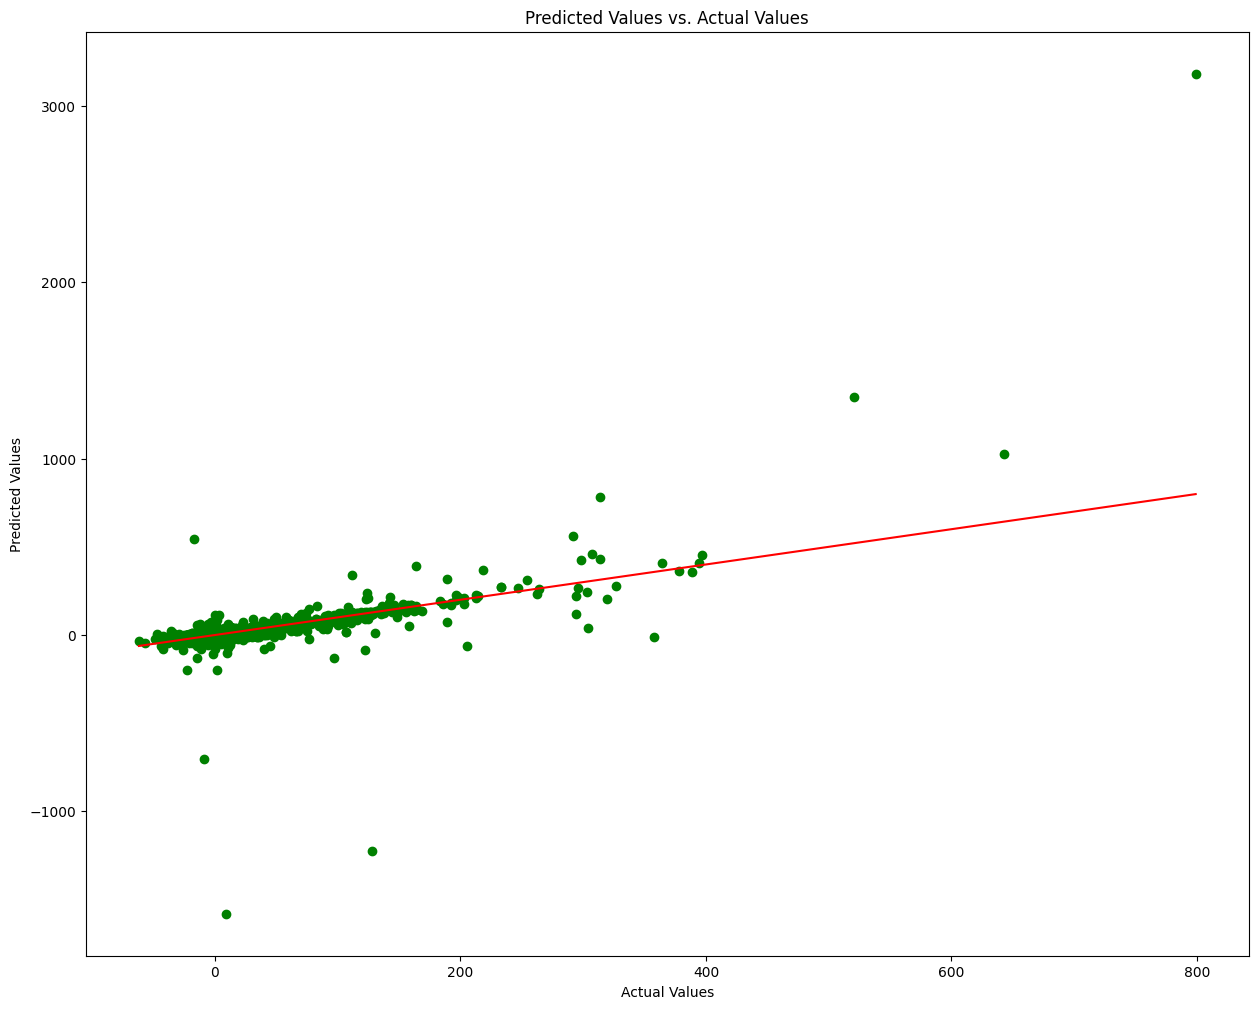

In [35]:
plt.figure(figsize = (15,12))
plt.scatter(y_test, y_pred, color = 'green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs. Actual Values')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

plt.show()
plt.show()

# Model drzewa decyzyjnego


## I podejście

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
kf = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 10),
                  'min_samples_split': range(2, 50, 2)
                  },
                  cv = 10, 
                  scoring = 'r2')
kf.fit(X_train, y_train)

print(kf.best_params_)
print(kf.best_score_)

{'max_depth': 7, 'min_samples_split': 12}
0.8773098630736795


## II podejście

In [ ]:
sample_size = 15000
sampled_data = data.sample(n= sample_size, random_state = 42)

In [ ]:
X = sampled_data.drop(['date' ,'arrival_delay', 'airline', 'scheduled_departure', 'wheels_off'], axis=1)
y = sampled_data['arrival_delay']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
kf = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 15),
                  'min_samples_split': range(20, 100, 5)
                  },
                  cv = 14, 
                  scoring = 'r2')
kf.fit(X_train, y_train)

print(kf.best_params_)
print(kf.best_score_)

{'max_depth': 7, 'min_samples_split': 20}
0.8624526848429757


In [ ]:
import matplotlib.pyplot as plt

model.feature_importances_

feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')

plt.show()

## III podejście

In [ ]:
sample_size = 20000
sampled_data = data.sample(n= sample_size, random_state = 42)

X = sampled_data.drop(['date' ,'arrival_delay', 'airline', 'scheduled_departure', 'wheels_off'], axis=1)
y = sampled_data['arrival_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(16000, 29)

In [ ]:
kf = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 25),
                  'min_samples_split': range(10, 120, 5)
                  },
                  cv = 20, 
                  scoring = 'r2')
kf.fit(X_train, y_train)

print(kf.best_params_)
print(kf.best_score_)

{'max_depth': 7, 'min_samples_split': 15}
0.8998589022051846


## IV podejscie - obecnie najlepsze

In [ ]:
kf = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 25),
                  'min_samples_split': range(10, 150, 10)
                  },
                  cv = 15, 
                  scoring = 'r2')
kf.fit(X_train, y_train)

print(kf.best_params_)
print(kf.best_score_)

{'max_depth': 7, 'min_samples_split': 10}
0.9058971297811589


## V podejscie - zbliżone wynikiem r2 do IV podejścia

In [ ]:
kf = GridSearchCV(model,
                  param_grid = {'max_depth': range(6, 30),
                  'min_samples_split': range(5, 150, 5)
                  },
                  cv = 15, 
                  scoring = 'r2')
kf.fit(X_train, y_train)

print(kf.best_params_)
print(kf.best_score_)

{'max_depth': 7, 'min_samples_split': 20}
0.9046551993818708


# Trenowanie modelu

## IV podejście

In [ ]:
best_max_depth = 7
best_min_samples_split = 10

In [ ]:
best_model = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state = 42)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2_Score: {r2}')

Mean Absolute Error: 8.817032584638593
Mean Squared Error: 280.8453335311462
R2_Score: 0.8745909934392048


## V podejście

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

best_max_depth = 7
best_min_samples_split = 20

In [ ]:
best_model = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state = 42)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2_Score: {r2}')

Mean Absolute Error: 8.859970962233222
Mean Squared Error: 284.4782855174858
R2_Score: 0.8729687307732688


Rysowanie drzewa decyzyjnego

In [ ]:
# fig = plt.figure(figsize=(25,15), dpi=125)
# tree_model = tree.plot_tree(best_model, feature_names = X.columns, filled = True)